In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.load("./metrics_save/corr/1.npy")

array([0.01756932, 0.12459053, 0.01342356, ..., 0.01966829, 0.10316435,
       0.07211354], shape=(7776,), dtype=float32)

In [3]:
corrs = []
for i in range(len(os.listdir("./metrics_save/corr"))):
    corr = np.load(f"./metrics_save/corr/{i}.npy")
    corrs.append(np.expand_dims(corr, 0))

In [4]:
corrs = np.concatenate(corrs, axis=0)
print(corrs.shape)

(120, 7776)


In [5]:
n = 1
diff_corrs = corrs[n:] - corrs[:-n]


In [6]:
losses = []
for i in range(len(os.listdir("./metrics_save/loss"))):
    loss = np.load(f"./metrics_save/loss/{i+1}.npy")
    losses.append(np.expand_dims(loss, 0))

In [7]:
losses = np.concatenate(losses, axis=0)
print(losses.shape)

(4200, 7776)


In [8]:
X = corrs[:,:100]
# Suppose X is your (N, 7776) array
X = X.T  # Now shape is (7776, N)

# Compute comparison matrix (vectorized)
greater = X[:, None, :] > X[None, :, :]
comparison_matrix = greater.mean(axis=2)  # shape (7776, 7776)

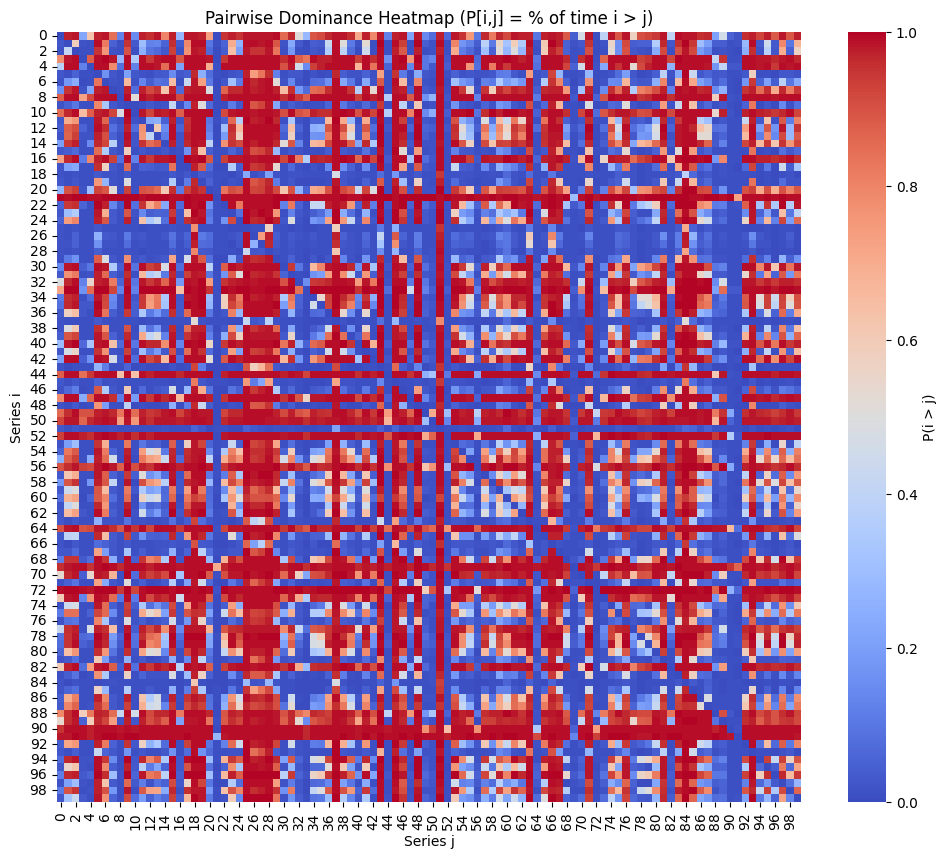

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    comparison_matrix,
    cmap='coolwarm',
    vmin=0, vmax=1,
    cbar_kws={"label": "P(i > j)"}
)
plt.title('Pairwise Dominance Heatmap (P[i,j] = % of time i > j)')
plt.xlabel('Series j')
plt.ylabel('Series i')
plt.show()

In [10]:
comparison_matrix.shape

(100, 100)

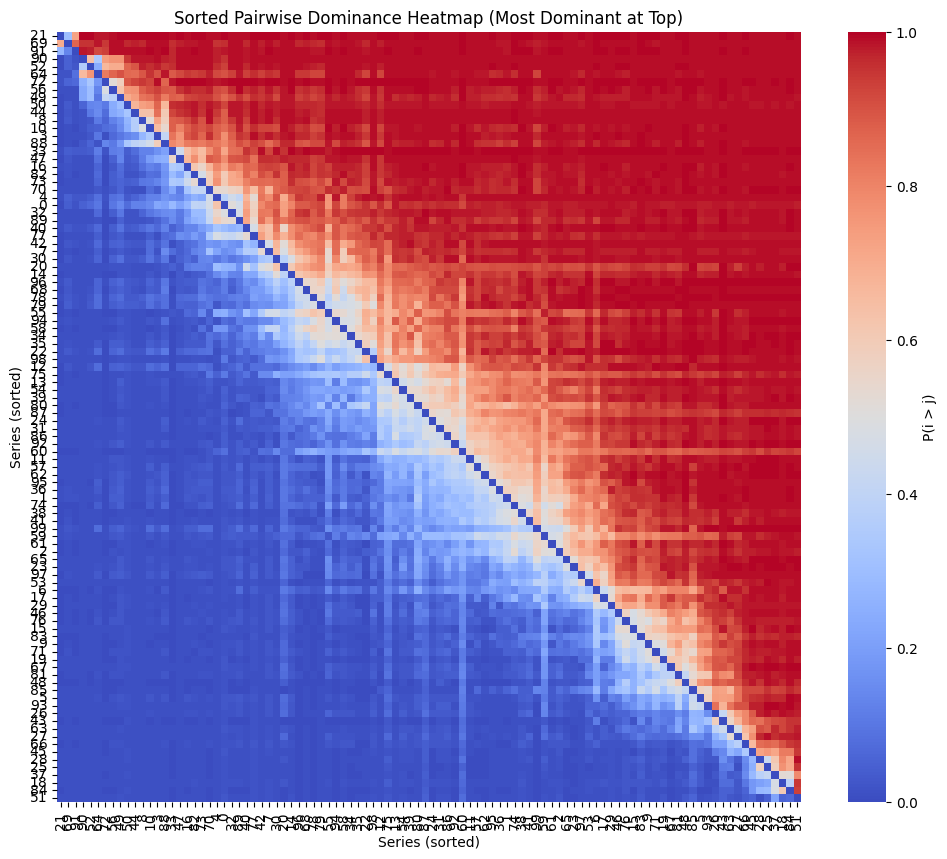

In [11]:
# Step 1: Compute dominance score
# This gives the average fraction of time each series dominates others
dominance_score = comparison_matrix.mean(axis=1)  # shape: (7776,)

# Step 2: Sort indices from most to least dominant
sorted_indices = np.argsort(-dominance_score)  # descending order

# Step 3: Reorder the matrix
sorted_matrix = comparison_matrix[sorted_indices][:, sorted_indices]

# Step 4: Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    sorted_matrix,
    cmap='coolwarm',
    vmin=0, vmax=1,
    xticklabels=sorted_indices,
    yticklabels=sorted_indices,
    cbar_kws={"label": "P(i > j)"}
)
plt.title('Sorted Pairwise Dominance Heatmap (Most Dominant at Top)')
plt.xlabel('Series (sorted)')
plt.ylabel('Series (sorted)')
plt.show()

In [12]:
sorted_indices

# array([19, 23, 36, 42, 46,  6,  9, 28, 22, 35,  7, 26, 27,  0, 38,  1, 34,
#        29, 37, 45, 39, 48,  3, 31,  2,  5, 40, 30, 44, 18, 41,  4, 11, 33,
#        17, 15, 13, 24, 32, 10, 43, 47, 25, 16,  8, 20, 12, 49, 14, 21])

array([21, 69, 91, 90, 52, 64, 72, 56, 49, 50, 44,  8, 10,  3, 88, 33, 47,
       16, 82, 73, 70,  4,  0, 32, 89, 40, 77, 42,  7, 30, 20, 14, 96, 68,
       78, 79, 55, 94, 58, 34, 35, 22, 98, 12, 75, 13, 54, 39, 80, 87, 24,
       31, 86, 92, 60, 11, 57, 62, 95, 36,  1, 74, 38, 41, 99, 59, 61,  2,
       65, 23, 97, 53,  6, 17, 29, 46, 76, 15, 83,  9, 71, 19, 67, 81, 48,
       85,  5, 93, 26, 43, 63, 27, 66, 45, 28, 25, 37, 18, 84, 51])

In [13]:
# comparison_matrix[sorted_indices[0]]

In [14]:
# sorted_matrix[0]

In [15]:
# dominance_score[51]

In [16]:
# corrs[:,69]

In [17]:
# corrs[:,51]

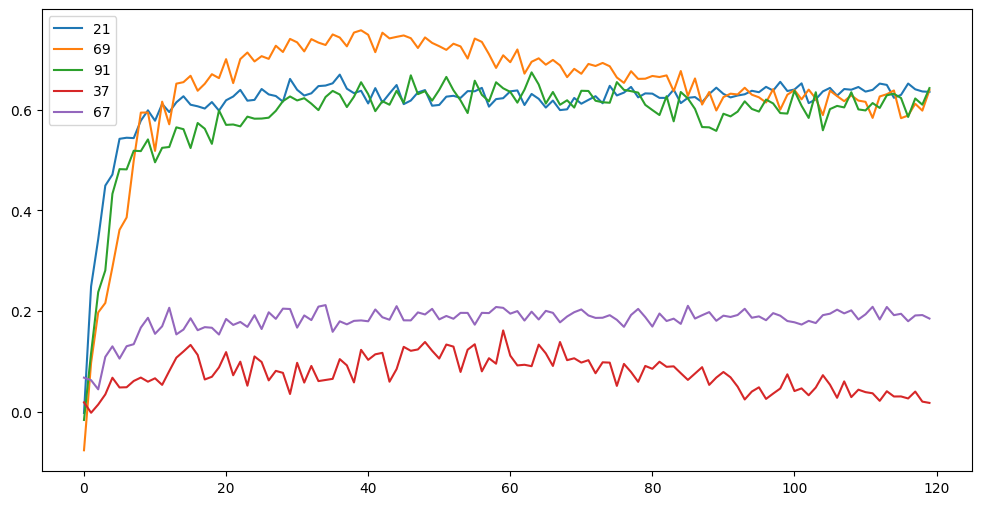

In [18]:
# series = [69, 40, 68, 95, 15, 76, 51] # For 100 neurons
# slow_corr_learners = [418, 990, 537, 409]
# series = [x for i, x in enumerate(sorted_indices) if (i % (len(sorted_indices)//3)) == 0] # slow_corr_learners
series = [21, 69, 91, 37, 67]#, 50, 47] # slow_corr_learners

plt.figure(figsize=(12, 6))
for i in series:
    plt.plot(corrs[:,i], label=i)

plt.legend()


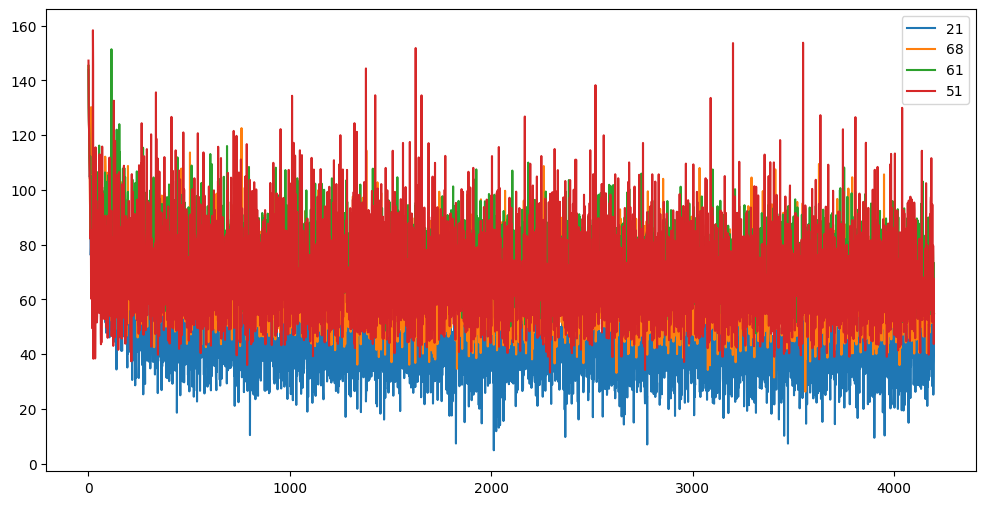

In [19]:
# series = [19, 34, 11, 14] # For 100 neurons
series = [x for i, x in enumerate(sorted_indices) if (i % (len(sorted_indices)//3)) == 0]

plt.figure(figsize=(12, 6))
for i in series:
    plt.plot(losses[:,i], label=i)

plt.legend()

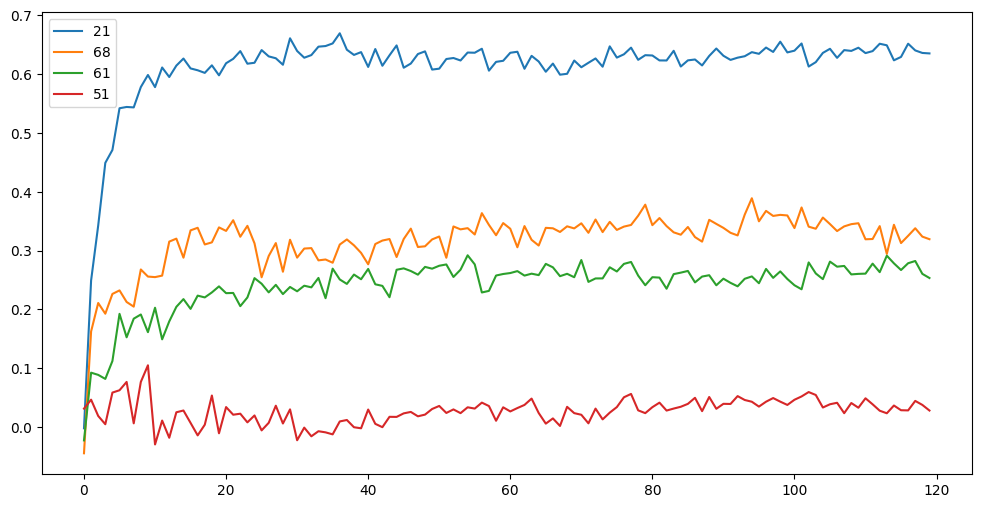

In [20]:
# series = [69, 40, 68, 95, 15, 76, 51] # For 100 neurons
series = [x for i, x in enumerate(sorted_indices) if (i % (len(sorted_indices)//3)) == 0]

plt.figure(figsize=(12, 6))
for i in series:
    plt.plot(corrs[:,i], label=i)

plt.legend()

In [21]:
diff_corr

NameError: name 'diff_corr' is not defined

In [ ]:
# This is impossible because you need to save different models which perform best for a particular neuron.
# However, this can be seen as a possible upperbound that can be achieved.
print("Mean of the max correlation per neuron across time:", np.max(corrs, axis=0).mean()) 

# This number is can be achieved by early stopping
print("Max of the mean correlation across neurons:", np.mean(corrs, axis=1).max())

print("Final mean correlation across neurons:", np.mean(corrs, axis=1)[-1])

Mean of the max correlation per neuron across time: 0.3459175
Max of the mean correlation across neurons: 0.29294252
Final mean correlation across neurons: 0.27517226


In [ ]:
X_new = X[np.max(X, axis=1) > 0]
X_new.shape

(100, 120)

In [ ]:
max_corrs = np.max(corrs, axis=0)

In [ ]:
np.argsort(- ((max_corrs - corrs[-1, :])/max_corrs))[1000:2000]

array([6159, 4178, 1890, 1845, 6627,  121, 4400, 3643, 3995,  174, 5682,
       3805, 3121, 6142, 7297, 4770, 6503, 3527,  595, 1310, 6393, 2526,
       1019, 1922,  472, 3097, 6801, 2223, 6753, 7221, 3332,  870,  392,
       3819, 6736, 2935, 2130, 4604, 4906,  547,  465, 5806,  898, 6567,
       2439, 6243, 6697, 5076, 5513, 2114, 5197, 1035, 3732, 4825, 4744,
       5947, 5059,  452, 7172, 7354, 1785, 6338, 1354, 4445, 6595,  344,
       4506, 7342, 6887, 2717, 6281, 7706, 1220, 4925, 6872, 4809, 7214,
       2438,  677, 3629, 2940, 3061, 6527,  115, 7316, 3440, 1369, 2872,
       6327, 1428, 6279, 6096, 5014, 1015, 7392, 6020, 1961, 2713, 2793,
       2398, 5278,  784, 6520, 4556,  936, 4567, 2292, 5622, 1324, 1125,
       6982, 6105, 6553, 2361,  310, 4456, 1215,  487, 6396, 2195, 4072,
       5090, 1406, 2224, 7375,  341,  664, 1926, 7639, 4195, 7174,  944,
       7666, 7341, 4862, 3775, 1439, 6634,  173, 2995, 4074, 5136, 2953,
       7244, 3104,  768, 7191, 6214, 4919, 2140, 60

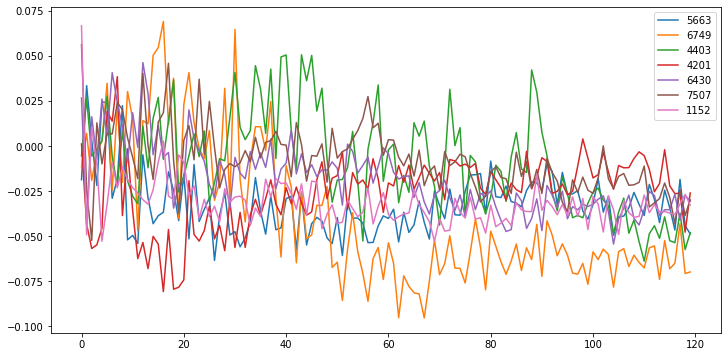

In [ ]:
# series = [69, 40, 68, 95, 15, 76, 51] # For 100 neurons
# series = [37, 51, 45, 75, 66, 27, 60]
series = [5663, 6749, 4403, 4201, 6430, 7507, 1152]
# series = [45]

plt.figure(figsize=(12, 6))
for i in series:
    plt.plot(corrs[:,i], label=i)

plt.legend()

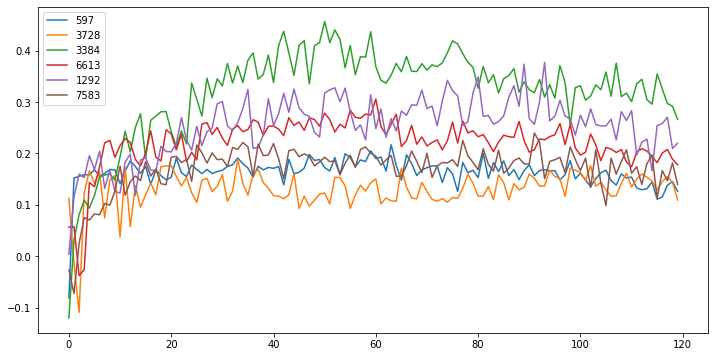

In [ ]:
# series = [69, 40, 68, 95, 15, 76, 51] # For 100 neurons
series = [21, 91, 44,  5, 30,  9, 59]
series = [597, 3728, 3384, 6613, 1292, 7583]
# series = [45]

plt.figure(figsize=(12, 6))
for i in series:
    plt.plot(corrs[:,i], label=i)

plt.legend()

In [ ]:
((max_corrs - X_new[:, -1])/max_corrs)[27]

0.49903733

(array([ 6.,  7.,  7., 12.,  5., 12., 10.,  7.,  4.,  5.,  2.,  1.,  5.,
         3.,  2.,  0.,  2.,  0.,  0.,  1.]),
 array([0.20577873, 0.23334825, 0.26091778, 0.2884873 , 0.31605682,
        0.34362632, 0.37119585, 0.3987654 , 0.4263349 , 0.45390442,
        0.48147392, 0.50904346, 0.536613  , 0.56418246, 0.591752  ,
        0.6193215 , 0.64689106, 0.6744606 , 0.70203006, 0.7295996 ,
        0.7571691 ], dtype=float32),
 <BarContainer object of 20 artists>)

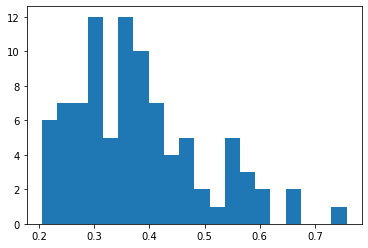

In [ ]:
plt.hist(max_corrs, bins=20)

In [ ]:
X_new.shape

(91, 120)

In [ ]:
np.max(X, axis=1)[36]

0.31405187

In [ ]:
corrs.shape

(120, 7776)

In [ ]:
max_corrs = np.max(corrs, axis=0)

In [ ]:
corrs.shape

(120, 7776)